[View in Colaboratory](https://colab.research.google.com/github/nhlakaniphom/Python/blob/master/deep_learning(neural%20networks).ipynb)

# Introduction to deep learning

## Imagine you work for a bank
* You need to predict how many transactions each customer
will make next year

In [0]:
from IPython.display import Image
Image('example.jpg')

<img src="example.jpg"/>

## Example as seen by linear regression

In [0]:
from IPython.display import Image
Image('ex2.png')

<img src="ex2.png"/>

## Interactions
* Neural networks account for interactions really well
* Deep learning uses especially powerful neural networks
    - Text
    - Images
    - Videos
    - Audio
    - Source code


Deep learning, a powerful set of techniques for learning in neural networks
![image.png](attachment:image.png)

Which of the models in the diagrams has greater ability to account for interactions?
<img src="ex21.png"/>

### Bank transactions example
* Make predictions based on:
    * Number of children
    * Number of existing accounts

## Forward propagation
The input X provides the initial information that then propagates to the hidden units at each layer and finally produce the output $\widehat{Y}$. 

**Depth** is the number of hidden layers.

**Width** is the number of units (nodes) on each hidden layer.




<img src="bank.jpg"/>
<img src="bank2.jpg"/>

Forward propagation
* Multiply - add process
* Dot product
* Forward propagation for one data point at a time
* Output is the prediction for that data point
### Implementation of Forward propagation

In [0]:
import numpy as np

input_data = np.array([2, 3])

weights = {'node_0':np.array([1,1]),
           'node_1':np.array([-1,1]),
           'output':np.array([2,-1])}


# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

print(output)

In this exercise, you'll write code to do forward propagation (prediction) for your first neural network:

<img src="Neural exe.png"/>

In [0]:
import numpy as np

input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [0]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)


-39


### Activation functions
<img src="Activation.png"/>
<img src="relu.png"/>

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

Here are some examples:

relu(3) = 3 

relu(-3) = 0 

In [0]:
input_data = np.array([-1, 2])
weights = {'node_0':np.array([3,3]),
           'node_1':np.array([1,5]),
           'output':np.array([2,-1])}


In [0]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

-3


### Applying the network to many observations/rows of data

In [0]:
input_data = [np.array([3, 5]), 
              np.array([ 1, -1]), 
              np.array([0, 0]), 
              np.array([8, 4])]

In [0]:
weight = {'node_0': np.array([2, 4]), 
          'node_1': np.array([ 4, -5]), 
          'output': np.array([2, 7])}

In [0]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output =  relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output =  relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weight))

# Print results
print(results)

[52, 63, 0, 148]


### Multilayer Neural Network
<img src="mulitlayer.png"/>

<img src="mulitlayer2.png"/>

### Representation learning
<img src="Deep-belief.png"/>

## The need for optimization

<img src="opti.png"/>


* Actual Value of Target: 13
* Error: Predicted - Actual = -4
<img src="opti2.png"/>
* Actual Value of Target: 13
* Error: Predicted - Actual = 0

### Predictions with multiple points
* Making accurate predictions gets harder with more points
* At any set of weights, there are many values of the error
* … corresponding to the many points we make predictions for

### Loss function
* Aggregates errors in predictions from many data points into single number
* Measure of model’s predictive performance

#### Squared error loss function
<img src="Error.png"/>
* Total Squared Error: 150
* Mean Squared Error: 50

#### Loss function
* Lower loss function value means a be!er model
* Goal: Find the weights that give the lowest value for the loss function
* Gradient descent

**Question:** What is the error (predicted - actual) for the following network when the input data is [3, 2] and the actual value of the target (what you are trying to predict) is 5? It may be helpful to get out a pen and piece of paper to calculate these values.
<img src="ex2_3.png"/>

**Question:** Imagine you have to make a prediction for a single data point. The actual value of the target is 7. The weight going from node_0 to the output is 2, as shown below. If you increased it slightly, changing it to 2.01, would the predictions become more accurate, less accurate, or stay the same?

**Coding how weight changes affect accuracy**
<img src="ex4.png"/>
Your task in this exercise is to update a single weight in weights_0 to create weights_1, which gives a perfect prediction (in which the predicted value is equal to target_actual: 3).

In [0]:
def predict_with_network(input_data_point, weights):
    node_0_input = (input_data * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    node_1_input = (input_data * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

In [0]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# # Calculate error: error_0
error_0 = model_output_0 - target_actual

# # Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]
            }

# # Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# # Print error_0 and error_1
print(error_0)
print(error_1)

6
0


#### Scaling up to multiple data points
You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points.

In [0]:
#Weights 0
weights_0 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1, 2]), 
             'output': np.array([1, 1])}

#Weights 1
weights_1 ={'node_0': np.array([2, 1]),
            'node_1': np.array([1. , 1.5]),
            'output': np.array([1. , 1.5])}

# input Data
input_data = [np.array([0, 3]), np.array([1, 2]),
              np.array([-1, -2]), np.array([4, 0])]

#Actual value 
target_actuals = [1, 3, 5, 7]

In [0]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 294.000000
Mean squared error with weights_1: 395.062500


### Gradient descent
* Imagine you are in a pitch dark field
* Want to find the lowest point
* Feel the ground to see how it slopes
* Take a small step downhill
* Repeat until it is uphill in every direction
<img src="Gradient.png"/>

### Gradient descent steps
* Start at random point
* Until you are somewhere flat:
    * Find the slope
    * Take a step downhill
<img src="GradientSlope.png"/>

### If the slope is positive:
* Going opposite the slope means moving to lower numbers
  * Subtract the slope from the current value
  * Too big a step might lead us astray
  * Solution: learning rate
* Update each weight by subtracting
$$learning\text{ } rate * slope$$

### Slope calculation example
<img src="slop.jpg"/>

Actual Target Value = 10

To calculate the slope for a weight, need to multiply:
* Slope of the loss function w.r.t value at the node we feed into
* The value of the node that feeds into our weight
* Slope of the activation function w.r.t value we
feed into

Slope of mean-squared loss function w.r.t prediction:
* 2 * (Predicted Value - Actual Value) = 2 * Error
* 2 * -4

The value of the node that feeds into our weight = 3

$2\times-4\times3$
$=24$
* If learning rate is 0.01, the new weight would be

$2 - 0.01(-24) = 2.24$

## Network with two inputs affecting prediction

<img src="NetworkSlope.png"/>

In [0]:
import numpy as np

In [0]:
weights=np.array([1,2])
input_data = np.array([3,4])
target = 6
learning_rate =0.01
preds = (weights * input_data).sum()
error = preds - target
print(error)

5


In [0]:
gradient = 2 * input_data * error
print (gradient)

[30 40]


In [0]:
weights_update = weights - learning_rate * gradient

In [0]:
preds_update = (weights_update * input_data).sum()

In [0]:
error_updated = preds_update - target

In [0]:
print(error_updated)

2.5


**Question**  Calculate the slope

In [0]:
input_data = np.array([1, 2, 3])
weights = np.array([1, 2, 3])

In [0]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error =  preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[16 32 48]


**Question** Improving model weights

In [0]:
input_date = np.array([1, 2, 3])
weights = np.array([0, 2, 1])

In [0]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - (learning_rate * slope)

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

1
0.7199999999999998


### Making multiple updates to weights

In [0]:
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])

In [0]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

In [0]:
def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

In [0]:
def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

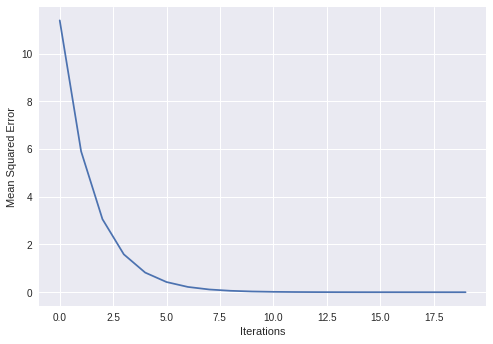

In [0]:
import matplotlib.pyplot as plt
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - (learning_rate * slope)
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Backpropagation
<img src="Backpropagation.png"/>